In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import scipy as sp
from sklearn import metrics
import statsmodels.api as sm
import shutil
import multiprocessing as mp# to run FIMO in parallel
from functools import partial
from datetime import datetime, date

os.getcwd()
os.chdir('../../')
# os.chdir('../proj/regeps/regep00/studies/LTRC/data/epigenetic/methylation/TopMed/data/tests/rejpz/LEVEL4')
# os.chdir("../../../../proj/regeps/regep00/studies/COPDGene/analyses/rebdh/ltrc/")
os.getcwd()

'/udd/redmo'

In [ ]:
# data=pd.read_csv('Beta_flagged.csv',chunksize=1000000)
chunksize = 10 ** 6
data=pd.read_table('data/Beta_flagged.txt',sep='\t', chunksize=chunksize,iterator=True)
#     data=(chunk)
# import dask.dataframe as dd
# data = dd.read_csv('Beta_flagged.txt',sep='\t')

In [ ]:
a=(data.get_chunk(10000))
plt.hist(a.unstack(level=0).dropna(how='all'))
# plt.hist(a.dropna(how='all').flatten)

In [ ]:
meth_ID['patID']=a.columns.str.split('_').str[3].tolist()

meth_ID=pd.DataFrame(meth_ID)
meth_ID['TOE']=a.columns.str.split('_').str[0].tolist()
a.columns=meth_ID['TOE']
# # link['TOE']=map['TOEID']
# # link['patid']=map['ALIAS']
# a

In [ ]:
meta['patid']=meta['patid'].astype('str')
meth_ID['patID']=meth_ID['patID'].astype('str')
# meta.merge(meth_ID,left_on='patid', right_on='patID')

In [ ]:
meta

In [ ]:
# link=map.S_SAMPLEID.str.split('-00').str[1].tolist()
# link=pd.DataFrame(link)
# link['TOE']=map['TOEID']
# link['patID']=map['ALIAS']
meta['patid']=meta['patid'].astype('str')
link['patID']=link['patID'].astype('str')


In [ ]:
# map=pd.read_table('data/LTRC_map.csv',sep=',')
# map['ALIAS'] in meth_ID
# list(set(link['TOE']).intersection(meth_ID['TOE']))
META=(link).merge(meta,left_on='patID',right_on='patid')

In [ ]:
a=a[list(set(META['TOE']).intersection(meth_ID['TOE']))]
# meth_ID.merge(META,left_on='TOE',right_on='TOE')
a = a.reindex(sorted(a.columns), axis=1)
a

In [ ]:
META=META.sort_values('TOE')
a.columns=META.subject_id

In [ ]:
from collections import Counter
meta=meta.dropna(axis=1, how='all')
# df = pd.DataFrame.from_dict(counts, orient='index')

# df.plot(kind='bar',figsize=(10,4))
plt.scatter(x=meta.ht_cm,y=meta.age_baseline)

In [ ]:
meta.dropna(axis=1, how='all').pmh_asthma_md


In [ ]:
predScore(indir='data/MotifPipeline/sthlm_motif55',outdir='data/MotifPipeline/test/sthlm_motif55/')#,cell='A549',TF='MYC')


In [ ]:
# os.chdir('../..')

# Diff Methyl LTRC

In [ ]:
# AnalyzeMilipeed_beta(
data_file='data/LTRC/bLTRC_b_funnorm_lbk.txt'
covar=['gender','clinCopd','age','race']
factor_file='data/LTRC/only_CG.txt'
meta_file='data/LTRC/diff/blood_meta.txt'
out='LTRC_glm_pard_output_blood/'
# os.mkdir(out)
computation='cpu'
gene_subset=None#'cg16269199'
ncov=len(covar)
from datetime import datetime, date
import statsmodels.api as sm
date="{:%d.%m.%Y}".format(datetime.now())

# import pandas as pd
# import numpy as np
# import netZooPy
# from netZooPy.milipeed.milipeed import Milipeed
# from netZooPy.milipeed.analyze_milipeed_beta import AnalyzeMilipeed_beta
# AnalyzeMilipeed_beta('data/LTRC/lLTRC_b_funnorm_lbk.txt',covar=['gender','clinCopd','age','race'],factor_file='data/LTRC/only_CG.txt',meta='data/LTRC/diff/lung_meta.txt',out='LTRC_glm_output_lung/',gene_subset=None,computation='cpu',ncores=8)
# AnalyzeMilipeed_beta('data/LTRC/bLTRC_b_funnorm_lbk.txt',covar=['gender','clinCopd','age','race'],factor_file='data/LTRC/only_CG.txt',meta='data/LTRC/diff/blood_meta.txt',out='LTRC_glm_output_blood/',gene_subset=None,computation='cpu',ncores=8)


In [ ]:
n_cores=1
total_links=pd.read_csv(factor_file,sep='\t',names=['gene'])
# total_links['gene']=total_links['gene'].str.replace('-','')
total_links['gene'] = [w.replace('.', '') for w in total_links['gene']]
tmp=total_links.replace('.','')
head=pd.DataFrame(pd.read_csv(data_file,sep='\t',index_col=None,skiprows=0,nrows=0))
ncov=len(covar)
metadata = pd.read_csv(meta_file,sep=',',header=0)
date="{:%d.%m.%Y}".format(datetime.now())
# operations=list(range(int(len(total_links)/n_cores)))
operations=list(range((n_cores)))

In [ ]:
dd=list(np.copy(covar))
dd.append('Intercept')
results_df = pd.DataFrame(columns=dd)

for count in operations:
    start=int((len(total_links)/n_cores)*count)
    end=int((len(total_links)/n_cores)*(count+1))
    append_data=pd.DataFrame(pd.read_csv(data_file,sep='\t',index_col=0,header=0,skiprows=start,nrows=end))
    append_data.columns=head.columns
    

    tmp=total_links[start:end]
    population=append_data.T
    population.columns=tmp['gene']
    metadata.index=metadata['fulltopmedId']

    append_data=metadata.merge(population,left_index=True,right_index=True)
    del append_data['fulltopmedId'], append_data['topmedId'], append_data['patid'], append_data['Project']

    for counts,gene in enumerate(tmp['gene']): #tmp['gene']:
        if type(covar) is list:
            fmla = (str(gene)) + "~"+'+'.join(covar)#.split(','))
            cc=list(np.copy(covar))
            cc.append(gene)
            sub_data=append_data[cc]
            del cc
        else:
            fmla = (str(gene)) + "~"+'+'.join(covar.split(','))
            sub_data=append_data[covar.split(',')+[gene]]
        sub_data.astype(float)

        if computation=='cpu':
            model = sm.formula.glm(fmla,family=sm.families.Gaussian(),data=sub_data.astype(float)).fit()
            (model)
            # print(fmla)
        elif computation=='gpu':
            mlr = LinearRegression()
            mlr.fit(append_data[covar], append_data[gene])
        results = pd.DataFrame({gene+"coeff":model.tvalues,gene+"pvals":model.pvalues,gene+"tvals":model.params,})
        results = results[[gene+"coeff",gene+"pvals",gene+"tvals"]]
        results_df = results_df.append(np.transpose(results[[gene+"tvals",gene+"pvals",gene+"coeff"]]))
        if (counts/10000).is_integer():
            print(counts/len(total_links))
results_df.to_csv(os.path.join(out+"_milipeed_analysis_"+date+".txt"),sep='\t')
# np.savetxt(os.path.join(out+"_milipeed_analysis_"+date+".txt"), results_df.values, fmt='%d')

In [ ]:
pvalss=results_df.filter(like='pvals', axis=0)
pvalss[pvalss['Intercept']<0.05]

## LTCOPD diff methylation

In [ ]:
# AnalyzeMilipeed_beta(
data_file='data/LTCOPD_betas.txt'
covar=['gender','ChannGOLD','age','race']

factor_file='data/LTCOPD_cg.txt'
meta_file='data/LTCOPD_pdat.txt'

out='LTCOPD_glm_output'
# os.mkdir(out)
computation='cpu'
gene_subset=None#'cg16269199'
ncov=len(covar)
from datetime import datetime, date
import statsmodels.api as sm
date="{:%d.%m.%Y}".format(datetime.now())

import pandas as pd
import numpy as np
import netZooPy
from netZooPy.milipede.milipede import milipede
# from netZooPy.milipede.analyze_milipede_beta import Analyzemilipede_beta
from netZooPy.milipede.analyze_milipede_gamma import Analyzemilipede_gamma
# import importlib
# importlib.reload(netZooPy)

from netZooPy.milipede.analyze_milipede_delta import Analyzemilipede_delta
# AnalyzeMilipeed_beta('data/LTRC/lLTRC_b_funnorm_lbk.txt',covar=['gender','clinCopd','age','race'],factor_file='data/LTRC/only_CG.txt',meta='data/LTRC/diff/lung_meta.txt',out='LTRC_glm_output_lung/',gene_subset=None,computation='cpu',ncores=8)
# AnalyzeMilipeed_beta('data/LTRC/bLTRC_b_funnorm_lbk.txt',covar=['gender','clinCopd','age','race'],factor_file='data/LTRC/only_CG.txt',meta='data/LTRC/diff/blood_meta.txt',out='LTRC_glm_output_blood/',gene_subset=None,computation='cpu',ncores=8)


In [ ]:
# data=pd.read_csv(data_file,sep='\t')
pdat=pd.read_csv(meta_file,sep='\t')
cg=pd.read_csv(factor_file,sep='\t')

In [ ]:
cg['IlmnID'].to_csv('data/LTCOPDcg_list.txt',sep='\t',index=0,header=0)
pdat['fulltopmedId']=pdat['SUBJECT']
pdat['female']=pd.get_dummies(pdat['sex'])['F']
pdat['COPD']=pd.get_dummies(pdat['ChannGOLD'])['Control']
pdat['white']=pd.get_dummies(pdat['race'])['C']

pdat[['fulltopmedId','female','COPD','age','white']].to_csv('data/LTCOPDpdat_list.txt',sep=',',index=0)

In [ ]:
Analyzemilipede_gamma(data_file,covar=['female','COPD','age','white'],factor_file='data/LTCOPDcg_list.txt',meta='data/LTCOPDpdat_list.txt',out='data/methLTCOPD_glm/',gene_subset=None,computation='cpu')#,ncores=8)
# Analyzemilipede_delta(data_file,covar=['female','COPD','age','white'],factor_file='data/LTCOPDcg_list.txt',meta='data/LTCOPDpdat_list.txt',out='test_LTRC_glm_IPF_output_blood/',gene_subset=None,computation='cpu',n_cores=2)


In [ ]:
ltcopd_diffM=pd.read_csv('data/methLTCOPD_glm/_milipede_analysis_24.02.2021.txt',sep='\t')
ltcopd_diffM=ltcopd_diffM.dropna(how='any',axis=0)
ltcopd_diffM

In [ ]:
g=ltcopd_diffM[ltcopd_diffM['Unnamed: 0'].str.contains('pvals')]
gg=g['Unnamed: 0'].str.split('pvals',expand=True)
g.index=gg[0]
del g['Unnamed: 0']
g=g.astype('float')
# ggg=g
ggg=g[g.Intercept>0]

In [ ]:
from statsmodels.stats.multitest import multipletests
AA=multipletests(ggg.COPD,alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
ggg['corr_Pval']=AA[1]
# bb=bpvalss[BB[0]]
ggg=ggg.sort_values('corr_Pval')
ggg=ggg[ggg.corr_Pval<.00000001]

In [ ]:
ggg.sort_values('COPD',ascending=False, inplace=True)
ggg

# LTRC expression

In [467]:
map=pd.read_csv('data/LTRC/LTRC_map.csv',sep=',',header=0,index_col=None)
# pheno=pd.read_csv('data/LTRC/LTRC_pheno.txt',sep='\t',header=0,index_col=None)
pheno=pheno=pd.read_csv('analyses/LTRC/ltrcLongTopMedHarm.csv',sep=',',header=0,index_col=None)
meta=pd.read_table('analyses/LTRC/ltrcSamplePhenoIdMap_20210428.csv',sep=',')
data=pd.read_table('data/LTRC/LTRC_topmed_to3_rnaseq_1.rsem_genes_expected_count.txt')
ipfPlate=pd.read_table('analyses/LTRC/modCopd_pathConservRna.pheno_022221.csv',sep=',')
# pheno_data.columns#.to_list()

meta2=meta.groupby(by='patid').mean()
# subP=pheno.dropna(subset=['rnaBamId'])
# mapp=meta2.merge(subP)
# mapp
# mappA=pheno.merge(meta2)


mappA=pheno.merge(meta2,on='patid')
subM=mappA.dropna(subset=['modCopd'])
mappA['head']=mappA['patid']

mappA[['age','race','gender','patid','bmi','smoking_packyears','clinCopd']].to_csv('data/LTRC/DC_pheno_LTRC_gene.txt',
                                                                                       sep='\t',index=True,header=True)

dd=pd.DataFrame(data.columns)
dd=dd[2:-1]

In [468]:
datat=np.transpose(data)
datat['subid']=datat.index.astype(str)
mappp=mappA[['rnaBamId','head','patid']]
mappp['rnaBamId']=mappp['rnaBamId'].astype(str)
mappp['rnaBamId']=mappp['rnaBamId'].str.split('.', 1, expand=True)[0]

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [470]:
mappp

,rnaBamId,head,patid
0,304641,100015,100015
1,304641,100015,100015
2,304641,100015,100015
3,304641,100015,100015
4,304641,100015,100015
...,...,...,...
7680,309343,80369,80369
7681,309267,80370,80370
7682,309267,80370,80370
7683,309267,80370,80370


In [471]:
MAP=mappp.merge(subM[['patid','modCopd']])
MAP['modCopd']=MAP['modCopd'].astype(str)
MAP['modCopd']=MAP['modCopd'].str.split('.', 1, expand=True)[0]
MAP['head']=MAP['head'].astype(str)+"_"+MAP['modCopd'].astype(str)
# MAP
data2=datat.merge(MAP,left_on='subid',right_on='rnaBamId')
data2.index=data2['patid']

In [ ]:
del data2['head'], data2['subid'], data2['rnaBamId'], data2['patid'],data2['modCopd']
data2.columns=data['gene_id']
data3=np.transpose(data2)
data2.to_csv('data/LTRC/DCM_LTRC_RNA.txt',sep='\t',index=True,header=True)


In [393]:
# data3.to_csv('data/LTRC/age_sex_LTRC_RNA.txt',sep='\t',index=False,header=True)
# key=pd.DataFrame(np.random.randn(data3.shape[0],data3.shape[1]))
# key=pd.DataFrame(np.random.randint(0, 50, size=(data3.shape[0],data3.shape[1])).astype("float") / 100)
# key.to_csv('data/LTRC/age_sex_LTRC_XXXkey.txt',sep='\t',index=False,header=True)
# [key.shape,data3.shape]
# data4=np.multiply(data3,key)
# data4.to_csv('data/LTRC/age_sex_LTRC_XXX.txt',sep='\t',index=False,header=True)

In [474]:
chr=pd.read_csv('analyses/LTRC/LTRC_exp_loc.txt',sep='\t',skiprows=0,header=None,index_col=None)
chr[1]=chr[1].str.replace('"', '')

In [503]:
# data2.columns.tolist()
cc=chr[chr[0]!='chrY'][1].str.replace(' ', '').tolist()

In [482]:
data1=data2.drop_duplicates()

In [505]:
data3 = data1[data1.columns.intersection(cc)]

In [611]:
chr=pd.read_csv('analyses/LTRC/LTRC_exp_loc.txt',sep='\t',names=['chr','ensg'],skiprows=0,header=None,index_col=None)
chr['ensg']=chr['ensg'].str.replace('"', '')
chr['ensg']=chr['ensg'].str.replace(' ', '')
# data3.columns.str.split('.',1).tolist()
chr[2]=pd.DataFrame(chr['ensg'].str.split('.',1).tolist())[0]
del chr['ensg']
chr.columns=['chr','ensg']

In [612]:
dd = pd.DataFrame(data3.columns.str.split('.',1).tolist())
pd.DataFrame(dd[0][:-92]).to_csv('LTRC_genes.txt',sep='\t',index=False,header=True)#
# data3[data3.index.str.contains(pat='ERCC')] # 58870 have ENSG ID, 92 ERCC

In [613]:
genes=pd.read_csv('data/LTRC/sex/LTRC_genes.txt',sep='\t',names=['ensg','gene'])
# genes=genes[:-92]

In [620]:
ee=genes.merge(chr,on='ensg')
ee.to_csv('data/LTRC/sex/LTRC_genes_chr.txt',sep='\t',index=False,header=True)

In [625]:
pd.unique(ee[ee['chr']=='chrY']['gene'])

array(['CD99', 'KDM5D', 'DDX3Y', 'ZFY', 'TBL1Y', 'PCDH11Y', 'AMELY',
       'PRKY', 'USP9Y', 'VAMP7', 'IL9R', 'TTTY1B', 'RPS4Y1', 'TTTY1',
       'VCY1B', 'VCY', 'CDY2B', 'TXLNGY', 'TTTY9B', 'TTTY6', 'TTTY6B',
       'TTTY7', 'TTTY7B', 'TMSB4Y', 'NLGN4Y', 'PPP2R3B', 'TSPY2', 'SPRY3',
       'DHRSX', 'ASMTL', 'SLC25A6', 'PRYP3', 'PRY', 'RBMY1F', 'PRY2',
       'RBMY1HP', 'TSPY14P', 'HSFY2', 'PRYP4', 'CDY1', 'CSPG4P4Y',
       'GOLGA2P3Y', 'CSPG4P3Y', 'CDY1B', 'HSFY1', 'AC007967.1', 'TGIF2LY',
       'TTTY14', 'GTPBP6', 'TTTY11', 'P2RY8', 'PLCXD1', 'CDY2A', 'WASH6P',
       'PRORY', 'TTTY8', 'SLC9B1P1', 'BPY2', 'BPY2B', 'UTY', 'SRY',
       'TTTY13', 'WASIR1', 'CD24P4', 'IL3RA', 'TTTY8B', 'BPY2C', 'SHOX',
       'DAZ3', 'TSPY13P', 'DAZ1', 'ANKRD36P1', 'TSPY7P', 'ASMT',
       'RBMY1A3P', 'GOLGA6L16P', 'AKAP17A', 'CSF2RA', 'EIF1AY', 'CRLF2',
       'DAZ4', 'PPP1R12BP2', 'DAZ2', 'GYG2P1', 'TTTY2', 'TTTY2B',
       'KRT18P10', 'ZBED1', 'PSMA6P1', 'TPTE2P4', 'RBMY2DP', 'ZNF736P11Y',
       '

In [578]:
genes=genes.drop_duplicates()
chr=chr.drop_duplicates()
chr=chr.sort_values('ensg')
chr=chr.reset_index()
del chr['index']
del chr['level_0']

In [ ]:
data3=data3.reset_index(drop=True)
data3=data3[:-92]
data3.columns=genes['gene']
# genes['gene']

In [23]:
data3=np.transpose(data3)

In [24]:
MAPP=mapp[['age','race','gender','saphId.cdnm','patid','bmi','smoking_packyears','clinCopd']]

In [25]:
data4.to_csv('data/LTRC/DC_LTRC_gene.txt',sep='\t',index=True,header=True)

NameError: name 'data4' is not defined

In [ ]:
# key=pd.DataFrame(np.random.randn(data3.shape[0],data3.shape[1]))
# key=pd.DataFrame(np.random.randint(0, 50, size=(data3.shape[0],data3.shape[1])).astype("float") / 100)
# key.to_csv('data/LTRC/age_sex_LTRC_XXXkey.txt',sep='\t',index=False,header=True)
# data4=np.multiply(data3,key)
data4.to_csv('data/LTRC/age_sex_LTRC_XXX.txt',sep='\t',index=True,header=True)

In [28]:
data33=np.transpose(data3)

In [29]:
dataAA=data33.reset_index()
dataBB=dataAA.dropna(how='any')
dataBB.index=dataBB['gene']
del dataBB['gene']

In [30]:
data5=np.transpose(dataBB)
data5=np.log2(data5.astype('float'))

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [31]:
data6=data5.merge(MAPP,on='patid')
data7=data6.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [32]:
data7.to_csv('data/LTRC/logDC_LTRC_gene.txt',sep='\t',index=True,header=True)

In [49]:
np.min(np.max(data5.replace([np.inf, -np.inf], np.nan).dropna(axis=1)))

4.954196310386875

In [50]:
MAPP

,age,race,gender,saphId.cdnm,patid,bmi,smoking_packyears,clinCopd
0,66.333333,1.0,0.0,ST-01028405,11059,27.51,20.00,0.0
1,78.000000,1.0,0.0,ST-01028308,11061,24.94,45.00,0.0
2,64.000000,1.0,1.0,ST-01028309,11062,23.70,49.50,1.0
3,68.000000,1.0,0.0,ST-01028374,11063,25.99,49.00,0.0
4,71.000000,1.0,1.0,ST-01028215,11067,29.06,34.50,0.0
...,...,...,...,...,...,...,...,...
1119,69.250000,1.0,1.0,ST-01028112,803469,28.84,55.00,0.0
1120,73.000000,3.0,1.0,ST-01028670,803477,38.31,NaN,0.0
1121,75.000000,3.0,1.0,ST-01028672,803520,27.40,10.00,1.0
1122,56.000000,4.0,1.0,ST-01028673,803546,20.21,35.00,1.0


In [631]:
data3=pd.read_csv('data/LTRC/age_sex_LTRC_gene.txt',sep='\t')

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [632]:
data3

,gene,67_0_1,67_0_1.1,71_0_1,59_0_1,69_0_1,71_0_1.1,60_1_1,64_1_1,74_1_1,...,67_0_1.23,59_0_1.12,64_1_1.23,64_1_1.24,67_1_1.15,65_0_1.7,45_1_1.5,47_1_1.5,47_1_1.6,62_1_1.17
0,TSPAN6,1135.0,683.0,633.0,516.0,708.00,616.00,938.00,779.00,590.0,...,825.00,579.0,643.00,643.00,691.00,1146.00,717.0,543.00,543.00,1230.0
1,TNMD,0.0,0.0,2.0,19.0,0.00,3.00,1.00,1.00,5.0,...,13.00,1.0,4.00,4.00,1.00,9.00,2.0,1.00,1.00,0.0
2,DPM1,811.0,534.0,699.0,395.0,443.00,662.00,516.00,692.00,558.0,...,827.00,922.0,740.00,740.00,613.00,1067.00,682.0,395.00,395.00,1146.0
3,SCYL3,754.0,361.0,496.0,358.0,450.00,565.00,459.00,598.00,350.0,...,384.00,743.0,607.00,607.00,295.00,565.00,500.0,421.00,421.00,559.0
4,C1orf112,162.0,106.0,119.0,145.0,138.00,110.00,87.00,176.00,100.0,...,126.00,149.0,116.00,116.00,111.00,145.00,102.0,129.00,129.00,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58865,NaN,0.0,0.0,0.0,0.0,4.75,5.71,2.99,1.47,0.0,...,5.47,0.0,1.46,1.46,2.77,2.82,0.0,1.62,1.62,0.0
58866,NaN,1.0,0.0,1.0,0.0,0.00,0.00,1.00,1.00,0.0,...,0.00,0.0,0.00,0.00,1.00,2.00,0.0,0.00,0.00,2.0
58867,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
58868,NaN,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,3.00,3.00,1.0


In [ ]:
import netZooPy
from netZooPy.panda.panda import Panda
# from netZooPy.milipeed.milipeed import Milipeed

In [633]:
FC=data3.iloc[:,data3.columns.str.contains('_0_1')]
FNC=data3.iloc[:,data3.columns.str.contains('_0_0')]
MC=data3.iloc[:,data3.columns.str.contains('_1_1')]
MNC=data3.iloc[:,data3.columns.str.contains('_1_0')]

# FC.to_csv('data/LTRC/sex/FC_exp.txt',sep='\t',index=True,header=False)
# FNC.to_csv('data/LTRC/sex/FNC_exp.txt',sep='\t',index=True,header=False)
# MC.to_csv('data/LTRC/sex/MC_exp.txt',sep='\t',index=True,header=False)
# MNC.to_csv('data/LTRC/sex/MNC_exp.txt',sep='\t',index=True,header=False)

In [634]:
[FC.shape,FNC.shape,MC.shape,MNC.shape]

[(58870, 272), (58870, 266), (58870, 354), (58870, 211)]

In [ ]:
[data3.iloc[:,data3.columns.str.contains('0_1')].shape[1]+data3.iloc[:,data3.columns.str.contains('1_1')].shape[1],
data3.iloc[:,data3.columns.str.contains('0_0')].shape[1]+data3.iloc[:,data3.columns.str.contains('0_0')].shape[1]]

In [ ]:
# panda_obj=netZooPy.panda.Panda(expression_file='data/LTRC/sex/FC_exp.txt', ###matrixes need no patient info
#       # methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
#       motif_file='Hugo_motifCellLine.txt', ###motif need no patient info
#         # motif_file='drive/My Drive/Colab Notebooks/gen_motif.txt', ###motif need no patient info
#       ppi_file='ppi_complete.txt',
#     computing='cpu',save_memory=True,save_tmp=False,remove_missing=True,
#     keep_expression_matrix=False,modeProcess='intersection',precision='single')
# panda_obj.save_panda_results('data/LTRC/sex/FC_LTRC.txt')
panda_obj1 = Panda('data/LTRC/sex/FC_exp.txt', 'Hugo_motifCellLine.txt', 'ppi_complete.txt',computing='cpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('data/LTRC/sex/FC_LTRC.txt',panda_obj.export_panda_results)
panda_obj1.export_panda_results.to_csv('data/LTRC/sex/FC_LTRC.txt',sep='\t',index=True,header=False)

In [ ]:
aa=data3.iloc[:,data3.columns.str.contains('0_1')].columns.str.split('_').str[0].tolist()
bb=data3.iloc[:,data3.columns.str.contains('1_1')].columns.str.split('_').str[0].tolist()

cc=pd.DataFrame(aa).append(pd.DataFrame(bb))
plt.figure(figsize=(18, 4))
# ddA=plt.hist(np.sort(cc[0]),bins=100,)

aa=data3.iloc[:,data3.columns.str.contains('0_0')].columns.str.split('_').str[0].tolist()
bb=data3.iloc[:,data3.columns.str.contains('1_0')].columns.str.split('_').str[0].tolist()

dd=pd.DataFrame(aa).append(pd.DataFrame(bb))
cc['group']='Case'
dd['group']='Control'
ee=pd.DataFrame(cc).append(pd.DataFrame(dd))
ee.columns=['age','group']
ee=ee.sort_values(by='age')
plt.figure(figsize=(18, 4))
# ddB=plt.hist(np.sort(cc),bins=100)

sns.histplot(data=ee, x='age', hue="group", multiple="dodge", shrink=.8)

# plt.legend((ddA, ddB),('Case','Control'))

In [ ]:
ee

In [ ]:
panda_obj=netZooPy.panda.Panda(expression_file='data/LTRC/sex/FNC_exp.txt', ###matrixes need no patient info
      # methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
      motif_file='Hugo_motifCellLine.txt', ###motif need no patient info
        # motif_file='drive/My Drive/Colab Notebooks/gen_motif.txt', ###motif need no patient info
      ppi_file='ppi_complete.txt',
    computing='cpu',save_memory=True,save_tmp=False,remove_missing=True,
    keep_expression_matrix=False,modeProcess='intersection',precision='single')
panda_obj.save_panda_results('data/LTRC/sex/FNC2_LTRC.txt')


## compare male

In [ ]:
MC=pd.read_csv('data/LTRC/sex/MC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')
MNC=pd.read_csv('data/LTRC/sex/MNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')

In [ ]:
from scipy.stats import zscore

In [ ]:
TFsum_3=MC.groupby(['TF']).agg({'force':sum})
TFsum_1=MNC.groupby(['TF']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=MC.groupby(['gene']).agg({'force':sum})
geneSum_1=MNC.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

# del [[MC, MNC]]
# gc.collect()
MC=pd.DataFrame()
MNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('data/LTRC/sex/TF_zscore_M.txt',sep='\t')
mmmm.to_csv('data/LTRC/sex/gene_zscore_M.txt',sep='\t',index=0)

In [ ]:
MALE=mmm
MALE

## compare female

In [ ]:
FC=pd.read_csv('data/LTRC/sex/FC_LTRC.txt',names=['TF','gene','motif','force'],sep='\t')
FNC=pd.read_csv('data/LTRC/sex/FNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')

In [ ]:
TFsum_4=FC.groupby(['TF']).agg({'force':sum})
TFsum_2=FNC.groupby(['TF']).agg({'force':sum})
TFsum_2['force']=zscore(TFsum_2['force'])
TFsum_4['force']=zscore(TFsum_4['force']) ##reduces range from 2500 to 4

geneSum_4=FC.groupby(['gene']).agg({'force':sum})
geneSum_2=FNC.groupby(['gene']).agg({'force':sum})
geneSum_4['force']=zscore(geneSum_4['force'])
geneSum_2['force']=zscore(geneSum_2['force'])

mmm=TFsum_4.merge(TFsum_2, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_4.merge(geneSum_2, left_on=['gene'], right_on=['gene'])

# del [[FC, FNC]]
# gc.collect()
FC=pd.DataFrame()
FNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('data/LTRC/sex/TF_zscore_F.txt',sep='\t')
mmmm.to_csv('data/LTRC/sex/gene_zscore_F.txt',sep='\t',index=0)

In [ ]:
# FEMALE=mmm
FEMALE.sort_values('diff')

In [ ]:
ff=pd.read_csv('data/LTRC/sex/TF_zscore_F.txt',sep='\t',header=0)
fff=pd.read_csv('data/LTRC/sex/gene_zscore_F.txt',sep='\t',header=0)
mm=pd.read_csv('data/LTRC/sex/TF_zscore_M.txt',sep='\t',header=0)
mmm=pd.read_csv('data/LTRC/sex/gene_zscore_M.txt',sep='\t',header=0)
sex_tf_diff=ff.merge(mm,on='TF')

a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='male')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='female')
plt.title('LTRC Sex-specific Ca-Co TF degree diff')
plt.legend(loc="best")


In [ ]:
# FEMALE
[sex_tf_diff[(sex_tf_diff['diff_y'])>.075].TF.values,sex_tf_diff[(sex_tf_diff['diff_y'])<-0.1].TF.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]


In [ ]:
# MALE
[sex_tf_diff[(sex_tf_diff['diff_x'])>.1].TF.values,sex_tf_diff[(sex_tf_diff['diff_x'])<-0.1].TF.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]


## Male V Female Case

In [ ]:
MC=pd.read_csv('data/LTRC/sex/MC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')
FC=pd.read_csv('data/LTRC/sex/FC_LTRC.txt',names=['TF','gene','motif','force'],sep='\t')


In [ ]:
TFsum_3=MC.groupby(['TF']).agg({'force':sum})
TFsum_1=FC.groupby(['TF']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=MC.groupby(['gene']).agg({'force':sum})
geneSum_1=FC.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

# del [[MC, MNC]]
# gc.collect()
MC=pd.DataFrame()
MNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('data/LTRC/sex/TF_zscore_Case.txt',sep='\t')
mmmm.to_csv('data/LTRC/sex/gene_zscore_Case.txt',sep='\t',index=0)

## Male V Female Control

In [ ]:
MNC=pd.read_csv('data/LTRC/sex/MNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')
FNC=pd.read_csv('data/LTRC/sex/FNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')

In [ ]:
TFsum_4=MNC.groupby(['TF']).agg({'force':sum})
TFsum_2=FNC.groupby(['TF']).agg({'force':sum})
TFsum_2['force']=zscore(TFsum_2['force'])
TFsum_4['force']=zscore(TFsum_4['force']) ##reduces range from 2500 to 4

geneSum_4=FNC.groupby(['gene']).agg({'force':sum})
geneSum_2=MNC.groupby(['gene']).agg({'force':sum})
geneSum_4['force']=zscore(geneSum_4['force'])
geneSum_2['force']=zscore(geneSum_2['force'])

mmm=TFsum_4.merge(TFsum_2, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_4.merge(geneSum_2, left_on=['gene'], right_on=['gene'])

# del [[FC, FNC]]
# gc.collect()
FC=pd.DataFrame()
FNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('data/LTRC/sex/TF_zscore_Control.txt',sep='\t')
mmmm.to_csv('data/LTRC/sex/gene_zscore_Control.txt',sep='\t',index=0)

In [ ]:
ff=pd.read_csv('data/LTRC/sex/TF_zscore_Case.txt',sep='\t',header=0)
fff=pd.read_csv('data/LTRC/sex/gene_zscore_Case.txt',sep='\t',header=0)
mm=pd.read_csv('data/LTRC/sex/TF_zscore_Control.txt',sep='\t',header=0)
mmm=pd.read_csv('data/LTRC/sex/gene_zscore_Control.txt',sep='\t',header=0)
sex_tf_diff=ff.merge(mm,on='TF')

a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='Case')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='Control')
plt.title('LTRC Sex-specific Male-Female TF degree diff')
plt.legend(loc="best")


In [ ]:
ltrc_diffM

In [ ]:
BB=multipletests(jjj.modCopd_pathConserv,alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
jjj['corr_Pval']=BB[1]
# bb=bpvalss[BB[0]]
jjj=jjj.sort_values('corr_Pval')
jjj=jjj[jjj.corr_Pval<.00000001]

# MattMoll proj (COPDGene)

In [ ]:
matt_train=pd.read_csv('data/LTRC/MM_pheno_train.txt',sep='\t',index_col=0)
matt_test=pd.read_csv('data/LTRC/MM_pheno_test.txt',sep='\t',index_col=0)
matt_all=pd.read_csv('data/LTRC/MM_pheno_all.txt',sep='\t',index_col=0)


In [ ]:
matt_all

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os,glob
os.chdir('../../')
# from Bio import SeqIO # to run Biopython
import pandas as pd
import multiprocessing as mp# to run FIMO in parallel
from functools import partial

In [73]:
meltboxA=pd.read_csv('/d/tmp/redmo/bench/alt/test/alt_results.txt',sep=',')
meltboxA=meltboxA.dropna(how='any')

total_reads=pd.read_csv('data/MotifPipeline/compare/total_reads.txt',sep=' ',names=['count','motif'])
TFs=pd.read_csv('mili_benchmark/data/Homo_sapiens_motifinfo.txt',sep='\t',header=None,names=['motif','tf'])
total2=total_reads.merge(TFs)

In [76]:

meltboxA=meltboxA.merge(total2)
meltboxA['perc_full']=np.divide(meltboxA['agg_len'].values.astype('float'),
          meltboxA['count'].values.astype('float'))
meltboxA['bin']=pd.cut(meltboxA['perc_full'], 6)

goldboxA=pd.melt(meltboxA,id_vars=['tf','bin'],value_vars=['pwm_auroc','W1_auroc'])

[Text(0, 0, 'pwm_auroc'), Text(1, 0, 'W1_auroc')]

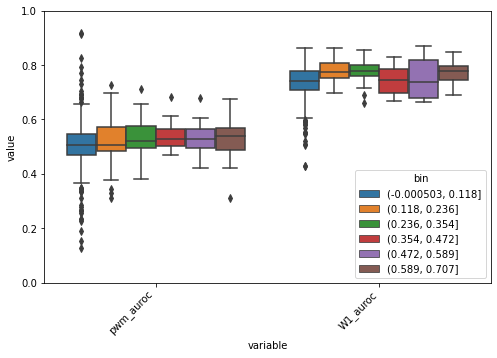

In [78]:
plt.figure(figsize=(8, 5))
g=sns.boxplot(x='variable',y=goldboxA.value.astype('float'),hue='bin', data=goldboxA)
g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [87]:
meltboxB=pd.read_csv('/d/tmp/redmo/bench/100/test/alt_results.txt',sep=',')
meltboxB=meltboxB.dropna(how='any')

total_reads=pd.read_csv('data/MotifPipeline/compare/total_reads.txt',sep=' ',names=['count','motif'])
TFs=pd.read_csv('mili_benchmark/data/Homo_sapiens_motifinfo.txt',sep='\t',header=None,names=['motif','tf'])
total2=total_reads.merge(TFs)

In [88]:

meltboxB=meltboxB.merge(total2)
meltboxB['perc_full']=np.divide(meltboxB['agg_len'].values.astype('float'),
          meltboxB['count'].values.astype('float'))
meltboxB['bin']=pd.cut(meltboxB['perc_full'], 6)

goldboxB=pd.melt(meltboxB,id_vars=['tf','bin'],value_vars=['pwm_auroc','W1_auroc'])

[Text(0, 0, 'pwm_auroc'), Text(1, 0, 'W1_auroc')]

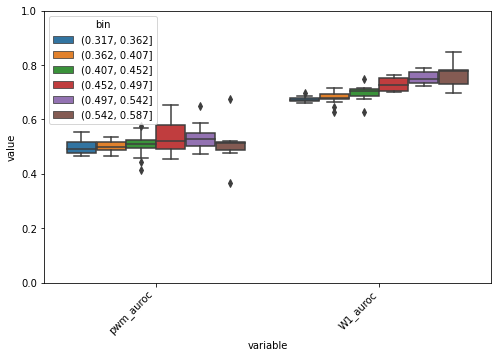

In [89]:
plt.figure(figsize=(8, 5))
g=sns.boxplot(x='variable',y=goldboxB.value.astype('float'),hue='bin', data=goldboxB)
g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [94]:
allresults=pd.read_csv('analyses/LTCOPD_sex_DE/allHits_COPD_V14_1435701821.txt',sep='\t',index_col=1)

Fresults=pd.read_csv('analyses/LTCOPD_sex_DE/female_topHitsA.txt',sep='\t',index_col=None)
F0results=pd.read_csv('analyses/LTCOPD_sex_DE/female_topHitsB.txt',sep='\t',index_col=0)

Mresults=pd.read_csv('analyses/LTCOPD_sex_DE/male_topHitsA.txt',sep='\t',index_col=0)
M0results=pd.read_csv('analyses/LTCOPD_sex_DE/male_topHitsB.txt',sep='\t',index_col=0)

loc=pd.read_csv('analyses/LTCOPD_sex_DE/chr_ill_loc.txt',sep='\t',index_col=0)

In [95]:
allresults=pd.merge(allresults,loc,left_index=True,right_on='probe_id')


In [102]:
AA=pd.merge(allresults,Fresults,right_index=True,left_on='probe_id')
BB=pd.merge(allresults,F0results,right_index=True,left_on='probe_id')
CC=pd.merge(allresults,Mresults,right_index=True,left_on='probe_id')
DD=pd.merge(allresults,M0results,right_index=True,left_on='probe_id')

(array([ 469., 1505., 1444., 1347.,    0., 2630., 1112.,  789., 1502.,
           0.,  928., 1658., 1639.,  834.,    0., 1088., 1354., 1272.,
         962.,    0., 1005., 1007., 1012.,  367.,    0.,  618.,  701.,
         321.,   68.,   15.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. ]),
 <BarContainer object of 30 artists>)

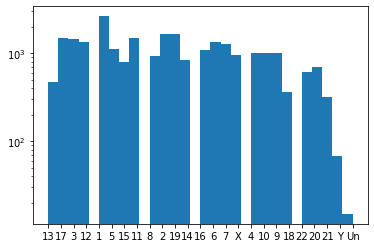

In [112]:
plt.hist(allresults.chromosome,bins=30,log=True)

In [105]:
AA=AA[AA.chromosome!='Y']
BB=BB[BB.chromosome!='Y']

In [106]:
pd.set_option('display.max_rows', 100)
AA.sort_values(by='adj.P.Val_y')[1:100].sort_values(by='rank')

,rank,symbol,entrez,P.Value_x,adj.P.Val_x,logFC_x,probe_id,chromosome,logFC_y,AveExpr,t,P.Value_y,adj.P.Val_y,B
29489,2,FLJ40504,284085.0,1.700502e-09,0.000028,-0.660883,ILMN_3187508,17,0.805234,3.258860,3.479439,0.000929,0.527377,-1.093058
9604,16,FRZB,2487.0,5.937773e-07,0.001218,0.820797,ILMN_1716246,2,-1.105632,10.350362,-3.741194,0.000405,0.397554,-0.510144
23978,61,ACTA1,58.0,1.985897e-05,0.010496,1.283082,ILMN_2125869,1,-2.043873,3.725082,-3.468657,0.000961,0.527377,-1.116552
23121,86,CAND2,23066.0,4.392703e-05,0.016687,0.407293,ILMN_2073592,3,-0.716620,7.567968,-4.020954,0.000161,0.377186,0.137182
10204,122,PYGM,5837.0,1.019054e-04,0.027423,0.465000,ILMN_1720849,11,-0.757731,3.795720,-3.254370,0.001849,0.553705,-1.574300
19832,175,S100A10,6281.0,2.076963e-04,0.038530,-0.224588,ILMN_1796712,1,0.373380,13.580393,3.255040,0.001845,0.553705,-1.572896
73,256,RGS5,8490.0,4.460339e-04,0.056995,0.559550,ILMN_1651554,1,-1.330742,10.054302,-4.393299,0.000045,0.294508,1.031588
3177,287,ING2,3622.0,5.449582e-04,0.062133,-0.252818,ILMN_1671265,4,0.559266,8.575851,3.770952,0.000367,0.397554,-0.442423
17844,297,C1orf56,54964.0,6.132495e-04,0.067649,-0.461635,ILMN_1780268,1,0.854598,5.362610,3.416261,0.001130,0.536473,-1.230105
5660,303,KLK10,5655.0,6.272154e-04,0.067961,-0.653001,ILMN_1688205,19,1.295489,4.855529,3.362345,0.001333,0.538582,-1.345870


In [107]:
pd.set_option('display.max_rows', 100)
BB.sort_values(by='adj.P.Val_y')[1:100].sort_values(by='rank')

,rank,symbol,entrez,P.Value_x,adj.P.Val_x,logFC_x,probe_id,chromosome,logFC_y,AveExpr,t,P.Value_y,adj.P.Val_y,B
29489,2,FLJ40504,284085.0,1.700502e-09,0.000028,-0.660883,ILMN_3187508,17,0.805234,3.258860,3.479439,0.000929,0.527377,-1.093058
9604,16,FRZB,2487.0,5.937773e-07,0.001218,0.820797,ILMN_1716246,2,-1.105632,10.350362,-3.741194,0.000405,0.397554,-0.510144
23978,61,ACTA1,58.0,1.985897e-05,0.010496,1.283082,ILMN_2125869,1,-2.043873,3.725082,-3.468657,0.000961,0.527377,-1.116552
23121,86,CAND2,23066.0,4.392703e-05,0.016687,0.407293,ILMN_2073592,3,-0.716620,7.567968,-4.020954,0.000161,0.377186,0.137182
10204,122,PYGM,5837.0,1.019054e-04,0.027423,0.465000,ILMN_1720849,11,-0.757731,3.795720,-3.254370,0.001849,0.553705,-1.574300
19832,175,S100A10,6281.0,2.076963e-04,0.038530,-0.224588,ILMN_1796712,1,0.373380,13.580393,3.255040,0.001845,0.553705,-1.572896
73,256,RGS5,8490.0,4.460339e-04,0.056995,0.559550,ILMN_1651554,1,-1.330742,10.054302,-4.393299,0.000045,0.294508,1.031588
3177,287,ING2,3622.0,5.449582e-04,0.062133,-0.252818,ILMN_1671265,4,0.559266,8.575851,3.770952,0.000367,0.397554,-0.442423
17844,297,C1orf56,54964.0,6.132495e-04,0.067649,-0.461635,ILMN_1780268,1,0.854598,5.362610,3.416261,0.001130,0.536473,-1.230105
5660,303,KLK10,5655.0,6.272154e-04,0.067961,-0.653001,ILMN_1688205,19,1.295489,4.855529,3.362345,0.001333,0.538582,-1.345870


In [84]:
pd.set_option('display.max_rows', 100)
CC.sort_values(by='adj.P.Val_y')[1:100].sort_values(by='rank')

,rank,symbol,entrez,P.Value_x,adj.P.Val_x,logFC_x,logFC_y,AveExpr,t,P.Value_y,adj.P.Val_y,B,ID
ILMN_1676938,1,HMGB1,3146.0,5.401324e-10,0.000018,-0.916362,-0.152746,3.674267,-0.348534,0.728596,0.999419,-4.700715,ILMN_1676938
ILMN_2125869,61,ACTA1,58.0,1.985897e-05,0.010496,1.283082,-2.029756,3.725082,-3.492158,0.000879,0.983301,-3.597921,ILMN_2125869
ILMN_2073592,86,CAND2,23066.0,4.392703e-05,0.016687,0.407293,-0.749534,7.567968,-3.703207,0.000449,0.818751,-3.481506,ILMN_2073592
ILMN_1726327,198,AMY1A,276.0,2.629858e-04,0.043606,-0.492224,1.014112,7.282323,3.611455,0.000603,0.860591,-3.532437,ILMN_1726327
ILMN_1651554,256,RGS5,8490.0,4.460339e-04,0.056995,0.559550,-1.248091,10.054302,-3.867296,0.000262,0.717657,-3.389338,ILMN_1651554
ILMN_1671265,287,ING2,3622.0,5.449582e-04,0.062133,-0.252818,0.563171,8.575851,3.792691,0.000335,0.786528,-3.431405,ILMN_1671265
ILMN_1811790,421,FOXS1,2307.0,1.298184e-03,0.101165,0.894506,-1.939747,5.910952,-3.523367,0.000797,0.980203,-3.580874,ILMN_1811790
ILMN_1756071,539,MFGE8,4240.0,2.055894e-03,0.125087,0.298189,-0.823539,12.433053,-3.869489,0.000260,0.717657,-3.388097,ILMN_1756071
ILMN_1744765,808,KRT4,3851.0,4.196178e-03,0.170416,-0.732244,2.340427,5.044333,4.276028,0.000065,0.690133,-3.155032,ILMN_1744765
ILMN_1783185,1064,SOX21,11166.0,6.740746e-03,0.207994,-0.732890,1.886125,4.876778,3.730946,0.000410,0.792334,-3.466019,ILMN_1783185


In [85]:
pd.set_option('display.max_rows', 100)
DD.sort_values(by='adj.P.Val_y')[1:100].sort_values(by='rank')

,rank,symbol,entrez,P.Value_x,adj.P.Val_x,logFC_x,logFC_y,AveExpr,t,P.Value_y,adj.P.Val_y,B,ID
ILMN_1742026,420,PYHIN1,149628.0,0.001296,0.101165,0.555697,-0.046369,5.304076,-3.417980,0.001099,0.150709,-1.521687,ILMN_1742026
ILMN_2389501,659,HSD11B1,3290.0,0.002871,0.142720,0.449906,-0.055109,8.734550,-4.221442,0.000078,0.146091,0.984621,ILMN_2389501
ILMN_1708098,788,LIX1L,128077.0,0.004048,0.168641,0.218939,-0.029007,7.637105,-4.321880,0.000055,0.146091,1.319807,ILMN_1708098
ILMN_1803941,1107,TBC1D15,64786.0,0.007230,0.214414,0.193101,-0.027247,9.992503,-4.658054,0.000017,0.146091,2.471749,ILMN_1803941
ILMN_2209993,1138,PLIN5,440503.0,0.007744,0.223303,-0.389305,0.058710,8.657604,3.626788,0.000569,0.150709,-0.902842,ILMN_2209993
ILMN_1811370,1148,HSD11B1,3290.0,0.007875,0.225205,0.501507,-0.085820,7.355394,-3.808399,0.000315,0.150709,-0.345153,ILMN_1811370
ILMN_3223500,1238,NaN,NaN,0.009036,0.239169,-0.357760,0.059597,11.397348,3.626189,0.000570,0.150709,-0.904652,ILMN_3223500
ILMN_1694514,1780,ZDHHC11,79844.0,0.016481,0.303980,-0.447820,0.052903,9.138446,3.826296,0.000297,0.150709,-0.289259,ILMN_1694514
ILMN_1701551,1975,ABCA6,23460.0,0.019231,0.319678,0.346059,-0.055267,8.322806,-3.977459,0.000179,0.150709,0.189252,ILMN_1701551
ILMN_1809437,2402,RHBDD2,57414.0,0.026028,0.355762,-0.163882,0.032477,11.281162,3.698717,0.000451,0.150709,-0.684060,ILMN_1809437


In [121]:
lung_data=pd.read_csv('~/analyses/LTRC/beta_lung.txt',header=None,index_col=None,skiprows=0,nrows=10,sep=' ')

In [122]:
blood_data=pd.read_csv('~/analyses/LTRC/beta_blood.txt',header=None,index_col=None,skiprows=0,nrows=10,sep=' ')

In [173]:
blood_pheno=pd.read_csv('~/data/LTRC/diff/blood_meta.txt',header=0,index_col=None)
lung_pheno=pd.read_csv('~/data/LTRC/diff/lung_meta.txt',header=0,index_col=None)

In [165]:
pheno2=pd.read_csv('~/analyses/LTRC/pheno_meta.txt',header=0,index_col=None,sep=' ')

In [178]:
aa=pheno2.merge(blood_pheno,right_on='fulltopmedId',left_on='new_id')
cc=aa[['fulltopmedId','gender_y','clinCopd','age_y','race_y','bmi']]
cc.to_csv('~/analyses/LTRC/blood_meta.txt',sep='\t',index=False)

In [179]:
aa=pheno2.merge(lung_pheno,right_on='fulltopmedId',left_on='new_id')
cc=aa[['fulltopmedId','gender_y','clinCopd','age_y','race_y','bmi']]
cc.to_csv('~/analyses/LTRC/lung_meta.txt',sep='\t',index=False)

In [4]:
blood_data=pd.read_csv('~/analyses/LTRC/beta_blood_rcp.txt',header=0,index_col=None,skiprows=0,nrows=100,sep=' ')
blood_meta=pd.read_csv('~/analyses/LTRC/blood_meta.txt',header=0,index_col=0,sep='\t')


In [8]:
blood=(np.transpose(blood_data).merge(blood_meta,right_index=True,left_index=True))
date="{:%d.%m.%Y}".format(datetime.now())
covar=list(['gender_y','age_y','clinCopd','race_y','bmi'])
cc=list(np.copy(covar))
cc.append('Intercept')
results_df = pd.DataFrame(columns=cc)

# for indices in blood.columns[0:-5]:
#     par_glm(indices,blood,covar,date,results_df)
   
    
pool = mp.Pool(20)
res  = pool.map(partial(par_glm,data=blood,covar=covar,date=date,results_df=results_df),blood.columns[0:-5])


In [6]:
def par_glm(indices,data,covar,date,results_df):    
    fmla = (str(indices)) + "~"+'+'.join(covar)
    try:
        model = sm.formula.glm(fmla,family=sm.families.Gaussian(),data=data).fit()
    except:
        pass
    results = pd.DataFrame({indices+"_tvals":model.tvalues,indices+"_pvals":model.pvalues,indices+"_coeff":model.params,})
    results = results[[indices+"_coeff",indices+"_pvals",indices+"_tvals"]]
    results_df = results_df.append(np.transpose(results[[indices+"_tvals",indices+"_pvals",indices+"_coeff"]]))
    results_df.to_csv('analyses/LTRC/blood_glm2_'+date+".txt",sep='\t',mode='a')


In [30]:
import json
import requests # to query enrichr

In [27]:
data2=pd.read_csv('~/analyses/LTRC/blood_methyl_results.modCopd_032621_4sv.csv',header=0,index_col=None,sep=',')

data=pd.read_csv('~/analyses/LTRC/blood_methyl_results.IPF_032621_4sv.csv',header=0,index_col=None,sep=',')
cg=pd.read_csv('~/netZooPy/tests/milipede/ToyData/MotifPrior_CGmap.txt',header=None,names=['tf','gene','ensemble'],index_col=2,sep='\t')


In [34]:
net1=data.merge(cg,on='ensemble',)[['tf','gene']]

In [28]:
data2.merge(cg,on='ensemble',)

,ensemble,logFC,AveExpr,t,P.Value,adj.P.Val,B,tf,gene
0,cg06367117,-4.675740e-03,0.023962,-4.843740,0.000002,0.999995,2.814553,M5234,ALDOC
1,cg06367117,-4.675740e-03,0.023962,-4.843740,0.000002,0.999995,2.814553,RFX4,ALDOC
2,cg06367117,-4.675740e-03,0.023962,-4.843740,0.000002,0.999995,2.814553,TFEB,ALDOC
3,cg21519980,-6.106886e-02,0.463276,-4.209929,0.000031,0.999995,0.066897,PLAG1,BIRC7
4,cg21519980,-6.106886e-02,0.463276,-4.209929,0.000031,0.999995,0.066897,ATF2,BIRC7
...,...,...,...,...,...,...,...,...,...
621706,cg13977526,3.054565e-08,0.037647,0.000021,0.999983,0.999996,-8.639840,SP1,ACO1
621707,cg13977526,3.054565e-08,0.037647,0.000021,0.999983,0.999996,-8.639840,SP3,ACO1
621708,cg13509665,-7.649220e-09,0.013240,-0.000016,0.999987,0.999996,-8.639840,ZNF691,MED21
621709,cg13436343,6.880179e-09,0.014147,0.000013,0.999989,0.999997,-8.639840,TERF2,PUM1


In [38]:
data3=pd.read_csv('~/analyses/LTRC/lung_methyl_results.modCopd_032621_sv2.csv',header=0,index_col=None,sep=',')
data3

,ensemble,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,cg13859208,-2.171278e-02,0.311245,-4.396598e+00,0.000014,0.957339,0.815177
1,cg07056626,2.125976e-02,0.445336,4.277879e+00,0.000023,0.957339,0.319760
2,cg23758626,1.230987e-02,0.821877,4.189469e+00,0.000034,0.957339,-0.041045
3,cg15006772,-2.757250e-02,0.248724,-4.144563e+00,0.000041,0.957339,-0.221633
4,cg12130523,2.817231e-02,0.510740,4.003164e+00,0.000073,0.957339,-0.778464
...,...,...,...,...,...,...,...
865854,cg10686522,-5.147132e-09,0.924047,-2.200991e-06,0.999998,0.999999,-8.668308
865855,cg00514628,-1.108423e-09,0.017499,-1.876747e-06,0.999999,0.999999,-8.668308
865856,cg21875096,-7.136540e-09,0.862514,-1.842300e-06,0.999999,0.999999,-8.668308
865857,cg20248458,1.022766e-09,0.026536,1.455539e-06,0.999999,0.999999,-8.668308


In [44]:
copd

,patid,date,sampleId.ltrc,rnaBamId,modCopd_pathConserv,age,race,gender,smoking_current,smoking_packyears,batch
0,100101,2005-04-21,101523,311656,0,64,1,0,0,0.00,Plate_26
1,100119,2005-05-13,100898,308937,0,70,1,0,0,0.00,Plate_18
2,100127,2005-05-11,101918,311637,1,74,1,1,0,126.00,Plate_26
3,100135,2005-05-15,101352,311608,1,60,1,1,0,63.00,Plate_25
4,100143,2005-07-11,102909,308720,1,71,1,1,0,108.00,Plate_16
...,...,...,...,...,...,...,...,...,...,...,...
639,803546,2014-08-26,137331,311667,1,56,4,1,0,35.00,Plate_26
640,80358,2017-03-07,143767,311522,0,28,4,0,0,0.00,Plate_25
641,803589,2014-09-11,142668,308247,0,78,3,0,0,11.25,Plate_9
642,80363,2017-03-30,143846,309240,1,60,1,1,0,45.00,Plate_21


In [49]:
meta

,ALIAS,new_id,Gender,S_SUBJECTID,Project,bmi,wt_kg,ht_cm,race,gender,age
0,11059,TOE601320_203281980257_R02C01_325690,F,ST-01028405,Methylation.lung,27.51,73.8,163.8,1,0,66
1,11059,TOE245252_203281980257_R01C01_325689,F,ST-01028405,Methylation.blood,27.51,73.8,163.8,1,0,66
2,11061,TOE791336_203286230079_R01C01_329680,F,ST-01028308,Methylation.blood,24.94,65.3,161.8,1,0,78
3,11061,TOE932381_203866380053_R06C01_329681,F,ST-01028308,Methylation.lung,24.94,65.3,161.8,1,0,78
4,11062,TOE922491_203504570057_R01C01_334391,M,ST-01028309,Methylation.lung,23.70,68.4,169.9,1,1,64
...,...,...,...,...,...,...,...,...,...,...,...
3515,803503,TOE508162_203299670012_R01C01_322829,M,ST-01028671,Methylation.blood,30.83,86.9,167.9,4,1,60
3516,803503,TOE276392_203299670012_R02C01_322830,M,ST-01028671,Methylation.lung,30.83,86.9,167.9,4,1,60
3517,803520,TOE957388_203508790036_R06C01_334364,M,ST-01028672,Methylation.lung,27.40,74.7,165.1,3,1,75
3518,803546,TOE712658_203301400046_R08C01_334707,M,ST-01028673,Methylation.lung,20.21,63.9,177.8,4,1,56


In [40]:
copd=pd.read_csv('data/LTRC/modCopd_pathConservRna.pheno_022221.csv',header=0,index_col=None,sep=',')


ipf=pd.read_csv('data/LTRC/ipfRna.pheno_022221.csv',header=0,index_col=None,sep=',')

In [48]:
meta=pd.read_csv('analyses/LTRC/pheno_meta.txt',header=0,index_col=None,sep=' ')

In [60]:
net1=copd.merge(meta,left_on='patid',right_on='ALIAS')
net2=ipf.merge(meta,left_on='patid',right_on='ALIAS')

In [63]:
copd_lung=net1[net1['Project']=='Methylation.lung']
copd_blood=net1[net1['Project']=='Methylation.blood']

ipf_lung=net2[net2['Project']=='Methylation.lung']
ipf_blood=net2[net2['Project']=='Methylation.blood']

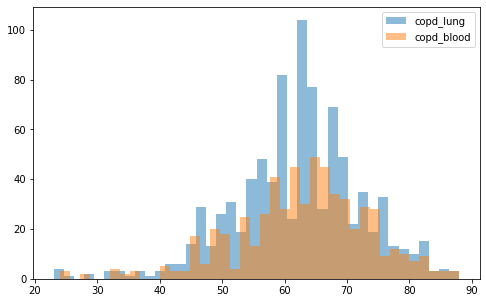

In [84]:
plt.figure(figsize=(8, 5))

tmp=plt.hist(copd_lung['age_y'],bins=40,label='copd_lung',alpha=.5)
tmp=plt.hist(copd_blood['age_y'],bins=40,label='copd_blood',alpha=.5)
plt.legend(loc="best")

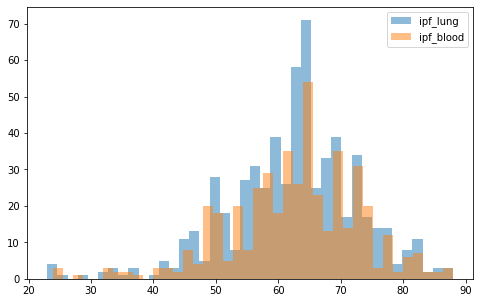

In [80]:
plt.figure(figsize=(8, 5))

tmp=plt.hist(ipf_lung['age_y'],bins=40,label='ipf_lung',alpha=.5)
tmp=plt.hist(ipf_blood['age_y'],bins=40,label='ipf_blood',alpha=.5)
plt.legend(loc="best")

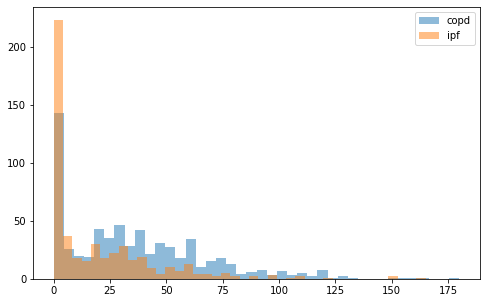

In [82]:
plt.figure(figsize=(8, 5))
tmp=plt.hist(copd.smoking_packyears,bins=40,alpha=.5,label='copd')
tmp=plt.hist(ipf.smoking_packyears,bins=40,alpha=.5,label='ipf')
plt.legend(loc="best")

## 050421 LTRC DE via Auyon

In [636]:
ltrc_F_copd=pd.read_csv('analyses/LTRC/F_results0.01FDR.modCopd_050421.csv')
ltrc_M_copd=pd.read_csv('analyses/LTRC/M_results0.01FDR.modCopd_050421.csv')

In [637]:
jeff=ltrc_M_copd.merge(ltrc_F_copd,on='ensemble',indicator=True, how='outer')
len(ltrc_M_copd.merge(ltrc_F_copd,on='ensemble'))#,indicator=True, how='outer')

4386

In [638]:
jeff['log_adj_diff']=np.log10(jeff['adj.P.Val_x'])-np.log10(jeff['adj.P.Val_y'])

In [639]:
[len(jeff),len(ltrc_M_copd),len(ltrc_F_copd),len(jeff[jeff['_merge']=='left_only']),len(jeff[jeff['_merge']=='right_only'])]

[5067, 4866, 4587, 480, 201]

In [640]:
jeff[jeff['_merge']=='right_only']

,ensemble,logFC_x,AveExpr_x,t_x,P.Value_x,adj.P.Val_x,B_x,logFC_y,AveExpr_y,t_y,P.Value_y,adj.P.Val_y,B_y,_merge,log_adj_diff
4866,ENSG00000179603,NaN,NaN,NaN,NaN,NaN,NaN,-1.550613,-0.994195,-8.315268,6.393741e-16,3.022595e-13,22.213346,right_only,NaN
4867,ENSG00000157150,NaN,NaN,NaN,NaN,NaN,NaN,0.966914,-0.214002,7.879881,1.597241e-14,4.556542e-12,20.381713,right_only,NaN
4868,ENSG00000175161,NaN,NaN,NaN,NaN,NaN,NaN,-1.303763,-0.393409,-7.827890,2.324688e-14,6.105442e-12,19.934343,right_only,NaN
4869,ENSG00000160161,NaN,NaN,NaN,NaN,NaN,NaN,1.062579,-0.337408,7.665763,7.399714e-14,1.632476e-11,19.190261,right_only,NaN
4870,ENSG00000178773,NaN,NaN,NaN,NaN,NaN,NaN,0.757085,0.008773,6.511193,1.601760e-10,9.045297e-09,12.518722,right_only,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,ENSG00000197930,NaN,NaN,NaN,NaN,NaN,NaN,-0.058001,5.612911,-3.030094,2.552333e-03,9.343120e-03,-2.506708,right_only,NaN
5063,ENSG00000140299,NaN,NaN,NaN,NaN,NaN,NaN,-0.030944,6.803511,-3.043391,2.443888e-03,9.027084e-03,-2.508445,right_only,NaN
5064,ENSG00000015133,NaN,NaN,NaN,NaN,NaN,NaN,-0.079868,5.410230,-3.010403,2.721052e-03,9.862546e-03,-2.537137,right_only,NaN
5065,ENSG00000172493,NaN,NaN,NaN,NaN,NaN,NaN,-0.053441,7.151443,-3.026607,2.581493e-03,9.433168e-03,-2.551569,right_only,NaN


In [641]:
cc=jeff[['adj.P.Val_x','adj.P.Val_y']]#
cc.columns=['Male adj p-val','Female adj p-val']

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


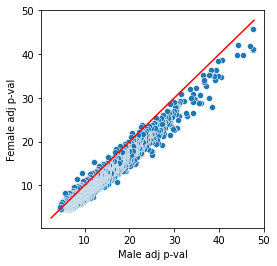

In [649]:
plt.figure(figsize=(4, 4))
g=sns.scatterplot(-np.log(cc['Male adj p-val']),-np.log(cc['Female adj p-val']))#,style=jeff['_merge'],size=jeff['_merge'],sizes=(5,500))
x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '-r')
# show()

In [193]:
ltcopd_F_copd=pd.read_csv('analyses/LTCOPD_sex_DE/female_ltcopd_de_all_covar.txt',sep='\t')
ltcopd_M_copd=pd.read_csv('analyses/LTCOPD_sex_DE/male_ltcopd_de_all_covar.txt',sep='\t')

In [204]:
FF=ltcopd_F_copd[ltcopd_F_copd['adj.P.Val']<0.2]
MM=ltcopd_M_copd[ltcopd_M_copd['adj.P.Val']<0.2]
jeff=ltcopd_M_copd.merge(ltcopd_F_copd,on='ID',indicator=True, how='outer')

In [205]:
[len(FF),len(MM)]

[250, 11]

In [209]:
MM[MM['adj.P.Val']<.05]

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B


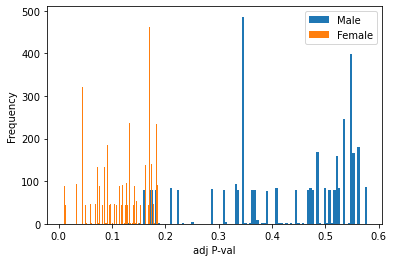

In [203]:
tmp=plt.hist(jeff['adj.P.Val_x'],bins=100,label='Male')
tmp=plt.hist(jeff['adj.P.Val_y'],bins=100,label='Female')
plt.xlabel("adj P-val")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()


In [178]:
jeff=ltcopd_M_copd.merge(ltcopd_F_copd,on='ID',indicator=True, how='outer')
print(len(ltcopd_M_copd.merge(ltcopd_F_copd,on='ID')))#,indicator=True, how='outer')
jeff['log_adj_diff']=np.log10(jeff['P.Value_x'])-np.log10(jeff['P.Value_y'])
[len(jeff),len(ltrc_M_copd),len(ltrc_F_copd),len(jeff[jeff['_merge']=='left_only']),len(jeff[jeff['_merge']=='right_only'])]
cc=jeff[['P.Value_x','P.Value_y']]#
cc.columns=['Male p-val','Female p-val']

234


In [155]:
jeff

,ID,logFC_x,AveExpr_x,t_x,P.Value_x,adj.P.Val_x,B_x,logFC_y,AveExpr_y,t_y,P.Value_y,adj.P.Val_y,B_y,_merge,log_adj_diff
0,SLC16A12,0.727594,3.623609,5.045276,0.000004,0.126690,3.193591,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
1,DLG2,-1.588550,5.657617,-4.809724,0.000009,0.152338,2.535449,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
2,NaN,-0.485905,8.115197,-4.621417,0.000018,0.161582,2.017400,0.796117,3.227109,5.665857,2.146055e-07,0.007046,6.391908,both,1.360469
3,NaN,-0.485905,8.115197,-4.621417,0.000018,0.161582,2.017400,1.514629,3.912337,5.306145,9.468450e-07,0.011493,5.120237,both,1.147951
4,NaN,-0.485905,8.115197,-4.621417,0.000018,0.161582,2.017400,1.233216,3.469657,5.280663,1.050221e-06,0.011493,5.031432,both,1.147951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,DYNLT3,NaN,NaN,NaN,NaN,NaN,NaN,0.909141,3.184813,3.316615,1.363498e-03,0.183581,-1.076077,right_only,NaN
3796,POLR3G,NaN,NaN,NaN,NaN,NaN,NaN,-0.595287,5.230068,-3.313859,1.375375e-03,0.183581,-1.083343,right_only,NaN
3797,PTPN2,NaN,NaN,NaN,NaN,NaN,NaN,1.276506,4.922965,3.313817,1.375556e-03,0.183581,-1.083453,right_only,NaN
3798,SETMAR,NaN,NaN,NaN,NaN,NaN,NaN,-0.363749,9.503999,-3.311183,1.387003e-03,0.184359,-1.090395,right_only,NaN


In [260]:
data=pd.read_csv('data/LTRC/SampleSheet.lung.comb.csv',sep=',')
jeff=data.ALIAS[data.ALIAS.duplicated()]
jeff2=data[data['ALIAS'].isin(jeff)]
jeff2=jeff2.sort_values('ALIAS')
jeff2.to_csv('data/LTRC/lung_comb_repl_samples.txt',sep='\t')


In [261]:
data=pd.read_csv('data/LTRC/SampleSheet.blood.comb.csv',sep=',')
jeff=data.ALIAS[data.ALIAS.duplicated()]
jeff2=data[data['ALIAS'].isin(jeff)]
jeff2=jeff2.sort_values('ALIAS')
jeff2.to_csv('data/LTRC/blood_comb_repl_samples.txt',sep='\t')
